<a href="https://colab.research.google.com/github/VARKALASAIVIGNESH/BancoDePortugal/blob/main/Final_Project_Banco_de_Portugal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving final.xlsx to final.xlsx


In [ ]:
df = pd.read_excel('final.xlsx')

In [ ]:
df.shape
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df.duplicated().sum()


0

In [ ]:
df.drop_duplicates(inplace=True)


### Summary Stats

In [ ]:
# Summary statistics for numerical columns
summary_stats = df.describe()
print(summary_stats)


               age     duration     campaign        pdays     previous  \
count  4119.000000  4119.000000  4119.000000  4119.000000  4119.000000   
mean     40.113620   256.788055     2.537266   960.422190     0.190337   
std      10.313362   254.703736     2.568159   191.922786     0.541788   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.000000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   4119.000000     4119.000000    4119.000000  4119.000000  4119.000000  
mean       0.084972       93.579704     -40.499102     3.621356  5166.481695  
std        1.563114        0.579349       4.594578     1.733591    73.667904  
min       -3.4000

In [ ]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


### Distribution of Numerical Features

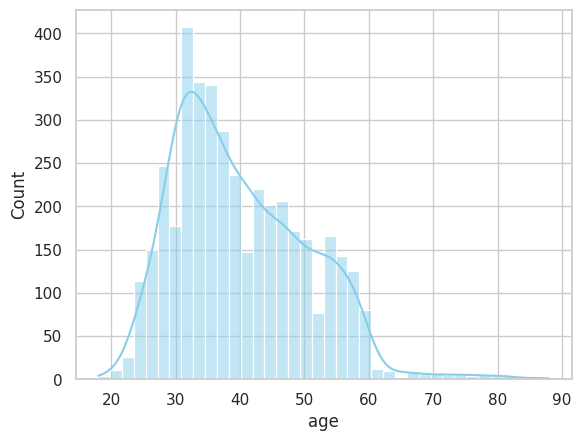

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")


# Age distribution
sns.histplot(df['age'], kde=True,color='skyblue')

plt.show()


Text(0.5, 1.0, 'Duration Distribution')

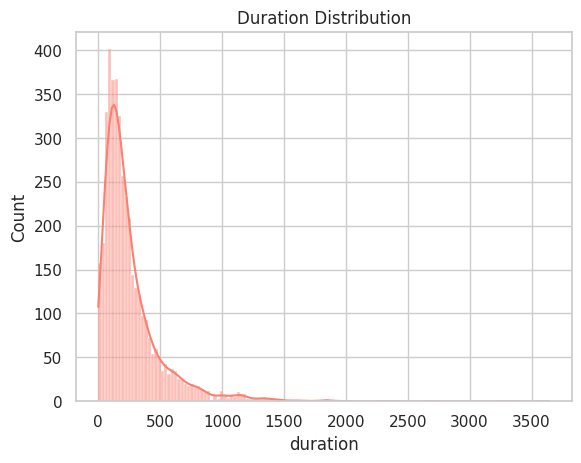

In [ ]:
# Duration distribution
sns.histplot(df['duration'], kde=True, color='salmon')
plt.title('Duration Distribution')


Text(0.5, 1.0, 'Campaign Distribution')

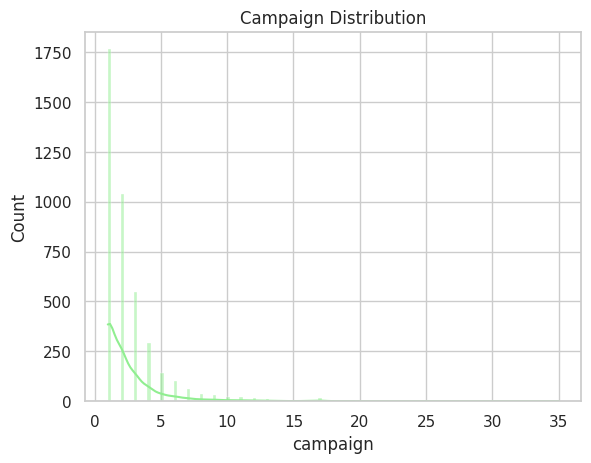

In [ ]:
# Campaign distribution
sns.histplot(df['campaign'], kde=True, color='lightgreen')
plt.title('Campaign Distribution')

### Analyzing Categorical values

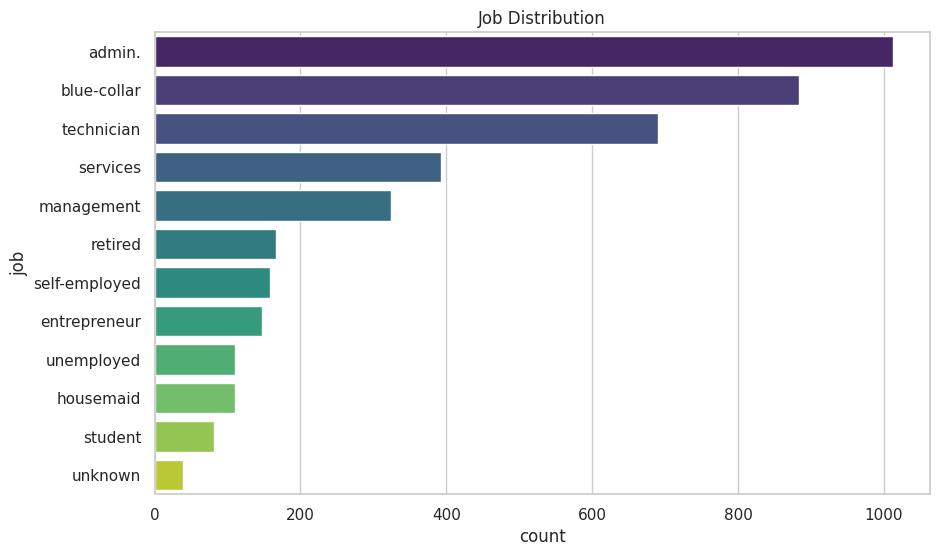

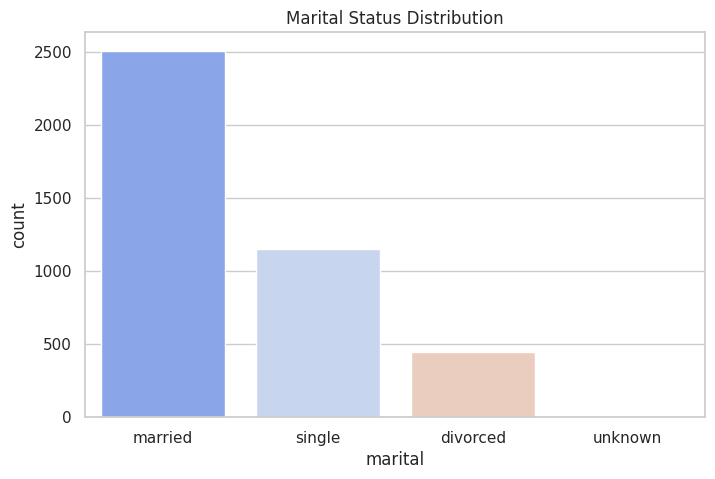

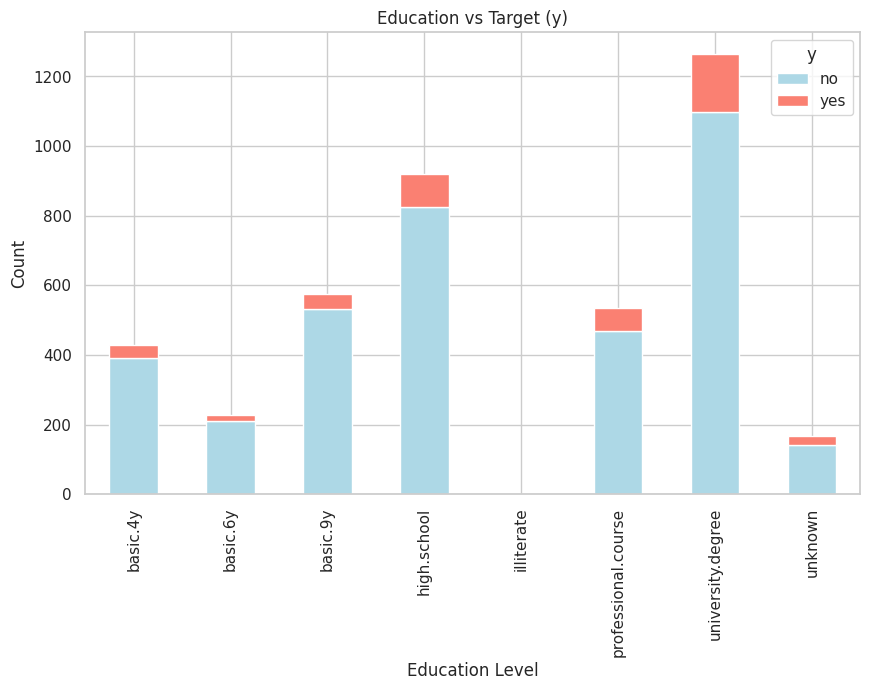

In [ ]:
# Count plot for the 'job' column
plt.figure(figsize=(10, 6))
sns.countplot(y='job', data=df, order=df['job'].value_counts().index, palette='viridis')
plt.title('Job Distribution')
plt.show()

# Count plot for the 'marital' column
plt.figure(figsize=(8, 5))
sns.countplot(x='marital', data=df, palette='coolwarm')
plt.title('Marital Status Distribution')
plt.show()

# Cross-tabulation of 'y' (target) with another categorical variable, e.g., 'education'
education_y = pd.crosstab(df['education'], df['y'])
education_y.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon'])
plt.title('Education vs Target (y)')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


### Convert categorical variables into numerical values

In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,False,False,False,False,False,False,False,True,False,False
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,False,False,False,False,False,False,False,True,False,False
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,False,False,False,False,False,False,True,True,False,False
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,False,False,False,False,False,False,False,True,False,False
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,True,False,False,True,False,False,False,True,False,False


### Finding outliers

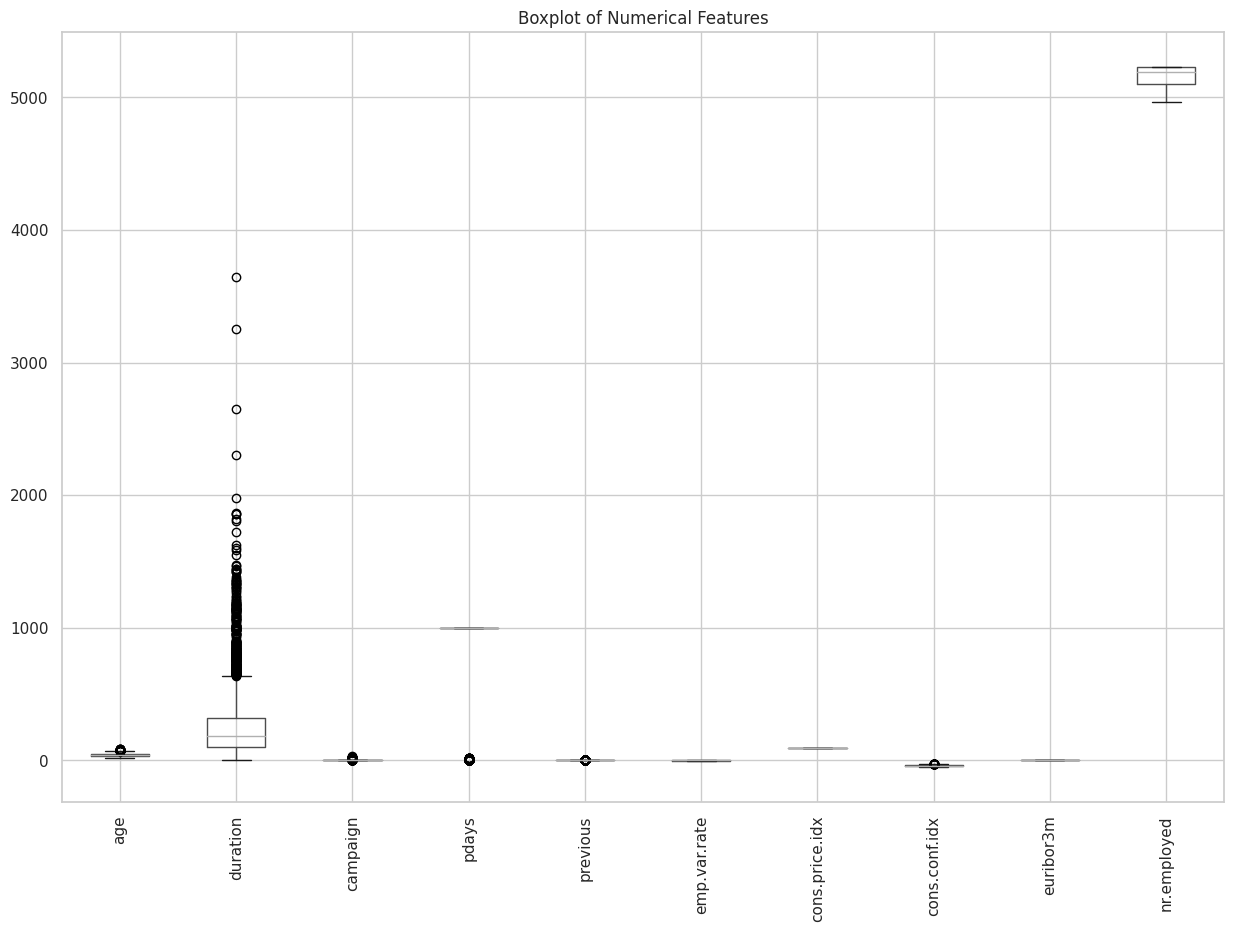

In [ ]:
# Plot boxplots for each numerical feature
plt.figure(figsize=(15, 10))
df.select_dtypes(include=[np.number]).boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot of Numerical Features')
plt.show()


In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)

# Cap outliers at the 1st and 99th percentiles
numeric_df = numeric_df.clip(lower=Q1, upper=Q3, axis=1)

# Reassign the capped numeric data back to the original dataframe
df[numeric_df.columns] = numeric_df

pd.set_option('display.max_column', None)
df.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,32,317,2,999,0,-1.8,93.075,-42.7,1.334,5099.1,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
1,39,317,3,999,0,1.1,93.994,-36.4,4.855,5191.0,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,32,227,1,999,0,1.4,93.994,-41.8,4.961,5228.1,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False
3,38,103,3,999,0,1.4,93.994,-41.8,4.959,5228.1,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
4,47,103,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False


In [ ]:
# Split data into features (X) and target (y)
X = df.drop('y_yes', axis=1)
y = df['y_yes']

In [ ]:
X.drop('duration', axis=1, inplace=True)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order

In [ ]:
# Create a DataFrame for visualization
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

In [ ]:
# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
0,age,0.095886
7,euribor3m,0.075939
1,campaign,0.060186
51,poutcome_success,0.052221
33,housing_yes,0.041732
6,cons.conf.idx,0.040642
4,emp.var.rate,0.034074
5,cons.price.idx,0.030799
20,marital_married,0.030059
50,poutcome_nonexistent,0.026162


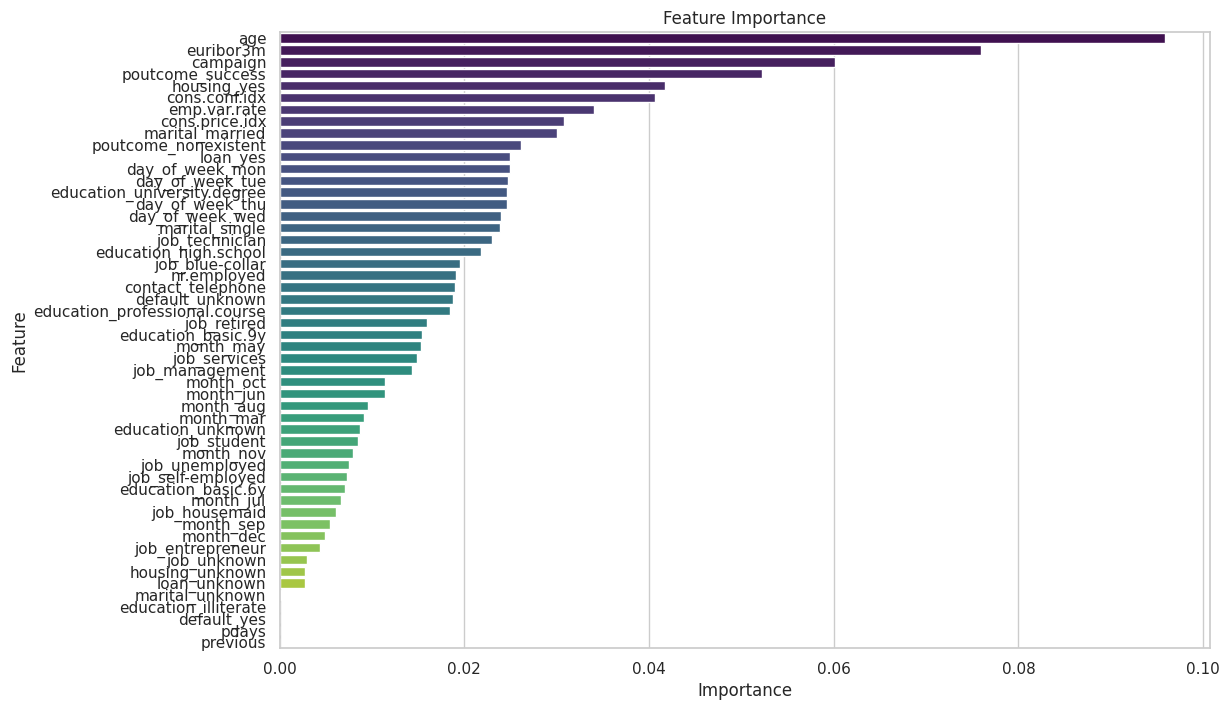

In [ ]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

k = 20

# Alternatively, use a threshold
# threshold = 0.01  # Include features with importance greater than this value

# Step 2: Select the most important features
top_k_indices = indices[:k]
# Or use threshold to filter
# top_k_indices = np.where(importances > threshold)[0]

selected_features = X_train.columns[top_k_indices]
print("Selected features:", selected_features)

X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]


rf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reduced.fit(X_train_reduced, y_train)


y_pred_reduced = rf_reduced.predict(X_test_reduced)
print("Accuracy on reduced features:", accuracy_score(y_test, y_pred_reduced))
print("Classification report on reduced features:\n", classification_report(y_test, y_pred_reduced))

Selected features: Index(['age', 'euribor3m', 'campaign', 'poutcome_success', 'housing_yes',
       'cons.conf.idx', 'emp.var.rate', 'cons.price.idx', 'marital_married',
       'poutcome_nonexistent', 'loan_yes', 'day_of_week_mon',
       'day_of_week_tue', 'education_university.degree', 'day_of_week_thu',
       'day_of_week_wed', 'marital_single', 'job_technician',
       'education_high.school', 'job_blue-collar'],
      dtype='object')
Accuracy on reduced features: 0.8895631067961165
Classification report on reduced features:
               precision    recall  f1-score   support

       False       0.91      0.98      0.94       732
        True       0.52      0.18      0.27        92

    accuracy                           0.89       824
   macro avg       0.71      0.58      0.61       824
weighted avg       0.86      0.89      0.87       824



In [ ]:
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]

# 2. Re-train the model on the reduced feature set
rf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reduced.fit(X_train_reduced, y_train)

# 3. Evaluate the model's performance
y_pred_reduced = rf_reduced.predict(X_test_reduced)
print("Accuracy on reduced features:", accuracy_score(y_test, y_pred_reduced))
print("Classification report on reduced features:\n", classification_report(y_test, y_pred_reduced))


from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_reduced, X_train_reduced, y_train, cv=5)
print("Cross-validated accuracy on reduced features:", cv_scores.mean())

Accuracy on reduced features: 0.8895631067961165
Classification report on reduced features:
               precision    recall  f1-score   support

       False       0.91      0.98      0.94       732
        True       0.52      0.18      0.27        92

    accuracy                           0.89       824
   macro avg       0.71      0.58      0.61       824
weighted avg       0.86      0.89      0.87       824

Cross-validated accuracy on reduced features: 0.894081942336874


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the model
dtree = DecisionTreeClassifier(random_state=42)

# Define a grid of hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model on the reduced training set
grid_search.fit(X_train_reduced, y_train)

# Get the best model
best_dtree_model = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train the final model with the best parameters
best_dtree_model.fit(X_train_reduced, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn import metrics

# Predict on test data
y_pred = best_dtree_model.predict(X_test_reduced)

# Evaluate predictions
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of the best Decision Tree model on test set:", accuracy)

Accuracy of the best Decision Tree model on test set: 0.8980582524271845


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.90      1.00      0.95       732
        True       0.79      0.12      0.21        92

    accuracy                           0.90       824
   macro avg       0.84      0.56      0.58       824
weighted avg       0.89      0.90      0.86       824



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clasSVM, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.8907767  0.8907767  0.8907767  0.88956311 0.89064399]
Average cross-validation score: 0.8905074378605388


## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
clasSVM = SVC(random_state = 42)
clasSVM.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
#calculate overall accuracy
y_pred = clasSVM.predict(X_test)
y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8883495145631068


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

classReport = classification_report(y_test, y_pred)
classReport

'              precision    recall  f1-score   support\n\n       False       0.89      1.00      0.94       732\n        True       0.00      0.00      0.00        92\n\n    accuracy                           0.89       824\n   macro avg       0.44      0.50      0.47       824\nweighted avg       0.79      0.89      0.84       824\n'

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.5,0.1,1,10],
              'gamma':['scale', 1,0.1, 0.01],
              'kernel':['rbf']}

optimal_params = GridSearchCV(SVC(), param_grid, cv = 5, scoring='accuracy', verbose=3)
optimal_params.fit(X_train, y_train)

# see "best" parameters
optimal_params.best_params_

# refit model with optimal hyperparameters
grid_predictions = optimal_params.predict(X_test.values)
clasSVM = SVC(random_state = 42, C=.5, gamma=0.01)
clasSVM.fit(X_train, y_train)

#calculate overall accuracy
y_pred = clasSVM.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.892 total time=   0.1s
[CV 2/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.891 total time=   0.1s
[CV 3/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.891 total time=   0.1s
[CV 4/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.891 total time=   0.1s
[CV 5/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.891 total time=   0.1s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.892 total time=   0.6s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.891 total time=   0.6s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.891 total time=   0.6s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.891 total time=   0.6s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.891 total time=   0.6s
[CV 1/5] END ......C=0.5, gamma=0.1, kernel=rbf;, score=0.894 total time=   0.3s
[CV 2/5] END ......C=0.5, gamma=0.1, kernel=rbf;

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clasSVM, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.8907767  0.8907767  0.8907767  0.88956311 0.89064399]
Average cross-validation score: 0.8905074378605388


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
rf_pred = rf.predict(X_test)
svm_pred = clasSVM.predict(X_test)
dt_pred = best_dtree_model.predict(X_test_reduced)


models = {
    "Random Forest": (rf_pred),
    "SVM": (svm_pred),
    "Decision Tree": (dt_pred)
}


metrics = {}

for model_name, (pred) in models.items():
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')


    metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,

    }

# Display metrics
for model_name, metric in metrics.items():
    print(f"{model_name} Performance Metrics:")
    for metric_name, value in metric.items():
        print(f"{metric_name}: {value:.2f}")
    print("\n")

Random Forest Performance Metrics:
Accuracy: 0.89
Precision: 0.86
Recall: 0.89
F1-Score: 0.86


SVM Performance Metrics:
Accuracy: 0.89
Precision: 0.79
Recall: 0.89
F1-Score: 0.84


Decision Tree Performance Metrics:
Accuracy: 0.90
Precision: 0.89
Recall: 0.90
F1-Score: 0.86




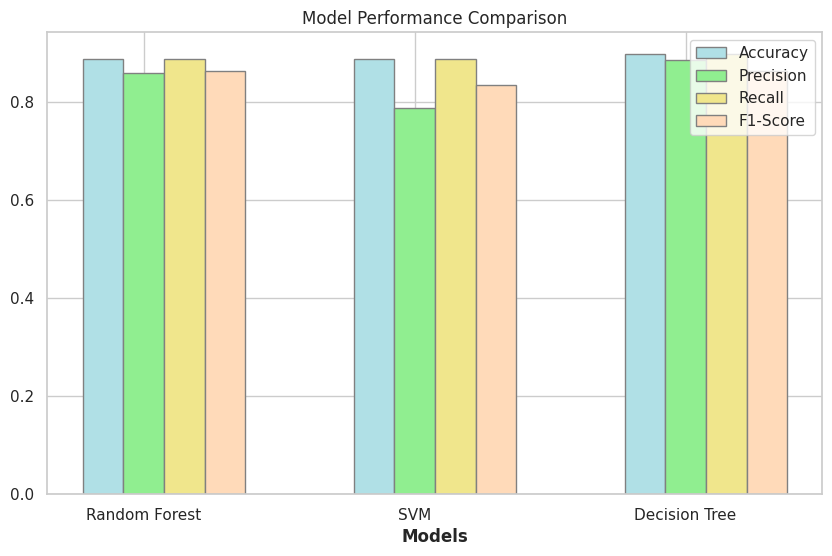

In [ ]:
# Prepare data for plotting
model_names = list(metrics.keys())
accuracy_scores = [metrics[model]["Accuracy"] for model in model_names]
precision_scores = [metrics[model]["Precision"] for model in model_names]
recall_scores = [metrics[model]["Recall"] for model in model_names]
f1_scores = [metrics[model]["F1-Score"] for model in model_names]

# Set width of bar
barWidth = 0.15

# Set positions of bars on x-axis
r1 = np.arange(len(model_names))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Make the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy_scores, color='powderblue', width=barWidth, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision_scores, color='lightgreen', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r3, recall_scores, color='khaki', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r4, f1_scores, color='peachpuff', width=barWidth, edgecolor='grey', label='F1-Score')


# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(model_names))], model_names)

# Create legend & Show graphic
plt.title('Model Performance Comparison')
plt.legend()
plt.show()

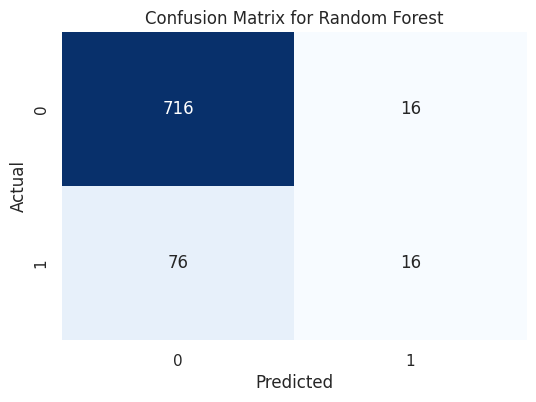

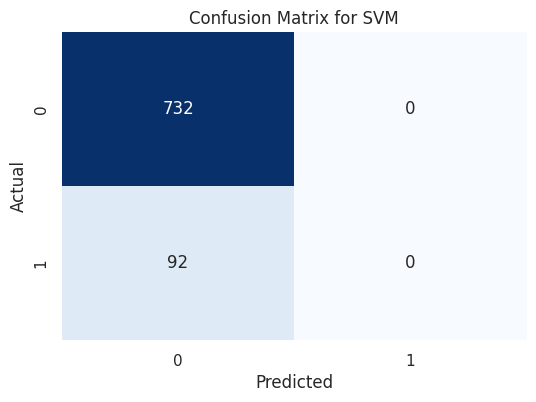

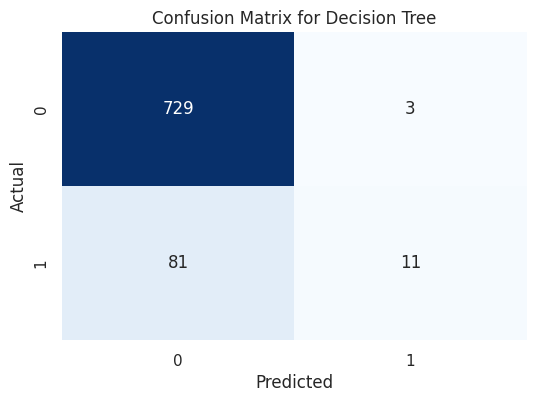

In [ ]:
import seaborn as sns

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot confusion matrices for each model
for model_name, (pred) in models.items():
    cm = confusion_matrix(y_test, pred)
    plot_confusion_matrix(cm, model_name)
